**План исследования**

<span style="color:green">1.Предобработка данных:<span>
 - Откроем датасет
 - Изучим таблицу визуально: какие столбцы есть вообще, и какие данные как в строках запсианны
 - Изучим данные на предмет: какой тип данных в каких столбцах и сколько в каждом столбце пропусков
 - Приведём названия колонок в одинаковый вид
 - Определить и заполнить пропуски в данных
 - Привести данные к нужному типу (при необходимости)
 - Проверить на дубликаты
 - Поискать и избавиться от аномалий в данных

<span style="color:green">2. Добавить данные в таблицу:<span>
- Суммарные продажи во всех регионах и запишите их в отдельный столбец

<span style="color:green">3. Проанализирвоать данные в датасете:<span>
- Сколько игр выпускалось в разные годы
- Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Взять данные за актуальный период
- Какие платформы лидируют по продажам, растут или падают?
- Пострить график «ящик с усами» по глобальным продажам игр в разбивке по платформам
- Проанализирвоать как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами
- Соотнести выводы на разных платформах между собой
- Посмотреть на общее распределение игр по жанрам

<span style="color:green">4. Составить портрет пользователя кажлого региона (NA, EU, JP):<span>
    
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<span style="color:green">5. Проверка гипотез:<span>
    
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<span style="color:green">6. Написать общий вывод<span>

<a name="stage_1"></a>
# 1. Прсомотр и предобработка данных

In [1]:
# импортируем все библиотеки, которые могут понадобиться и прочитаем датасет
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from scipy import stats as st

data = pd.read_csv('/datasets/games.csv')


In [2]:
#посмотрим на табилцу
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# посмотрим на общую информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# посмотрим на пропуски
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Поменяем заглавные буквы на стрчоные в названиях колнок**

In [5]:
#теперь заменим все заглавные буквы в названиях колонок на строчные
#получаем список названия колонок
data.columns.tolist()


['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [6]:
#меняем 
data.columns = data.columns.str.lower()

In [7]:
#првоерим что получилось
data.columns.tolist()

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

**Работаем с пропусками**

In [8]:
#есть 2 пропска в колонке Name. Поскольку их всего два, логично будет удалить .т.к. на общую картину при анализе 
#они врядли повлияют.

data = data.dropna(subset=['name']) 

#далее смотрим на "year_of_release". там 269 пропусков. Тоже не кретичное значение, ктому же мы не можем даже предположить
#какой год выпуска у игры, и поскольку их тоже не много, логично будет удалить

data = data.dropna(subset=['year_of_release']) 

# "critic_score" - здесь пропусков уже много, просто удалить - моэно их потерять. здесь, считаю, логично будет заменить на 
# медианое значение, т.к. слишком низкие или высокие оценки могут повлиять на среднее и исказить общую оценку

data['critic_score']= data['critic_score'].fillna(0)

#"user_score" -меняем на 0 поскольку это может означать, что пользвоатель никак не оценил игру, поставил ей 0
data['user_score']= data['user_score'].fillna(0)

#"rating" - данные это буквы. заменим их буквой "N", что означает, нет рейтинга
data['rating']= data['rating'].fillna('N')

#есть значения "tbd" в "user_score", скорее всего это аналог пропусков. его надо заменить на 0 по той же логике что 
#и обычные пропуски
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan
data['user_score']= data['user_score'].fillna(0)


In [9]:
#проверяем остались ли пропуски
data.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**Привести данные к нужному типу**

In [10]:
# дата релиза почему-то в типе данных float. првиедём её к int
data['year_of_release'] = data['year_of_release'].astype('int')
data['critic_score'] = data['critic_score'].astype('Int64')
data['user_score'] = data['user_score'].astype('float64')
# и сразу првоеряем
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  Int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


**Проверим на дубликаты**

In [11]:
# првоерим на явные дубликаты
data.duplicated().sum()

0

In [12]:
# затем на не явные
data['name'].unique().tolist()

['Wii Sports',
 'Super Mario Bros.',
 'Mario Kart Wii',
 'Wii Sports Resort',
 'Pokemon Red/Pokemon Blue',
 'Tetris',
 'New Super Mario Bros.',
 'Wii Play',
 'New Super Mario Bros. Wii',
 'Duck Hunt',
 'Nintendogs',
 'Mario Kart DS',
 'Pokemon Gold/Pokemon Silver',
 'Wii Fit',
 'Kinect Adventures!',
 'Wii Fit Plus',
 'Grand Theft Auto V',
 'Grand Theft Auto: San Andreas',
 'Super Mario World',
 'Brain Age: Train Your Brain in Minutes a Day',
 'Pokemon Diamond/Pokemon Pearl',
 'Super Mario Land',
 'Super Mario Bros. 3',
 'Grand Theft Auto: Vice City',
 'Pokemon Ruby/Pokemon Sapphire',
 'Brain Age 2: More Training in Minutes a Day',
 'Pokemon Black/Pokemon White',
 'Gran Turismo 3: A-Spec',
 'Call of Duty: Modern Warfare 3',
 'Pokémon Yellow: Special Pikachu Edition',
 'Call of Duty: Black Ops 3',
 'Call of Duty: Black Ops',
 'Pokemon X/Pokemon Y',
 'Call of Duty: Black Ops II',
 'Call of Duty: Modern Warfare 2',
 'Grand Theft Auto III',
 'Super Smash Bros. Brawl',
 'Mario Kart 7',
 'Ani

**Поиск и обработка аномалий**

In [13]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,33.494405,3.234237
std,5.875525,0.818378,0.506716,0.311100,0.188005,35.821558,3.689043
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.000000,0.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Явные анмоальные значения отсутствуют

<a name="stage_1"></a>
# 2. Добавление данных в таблицу

In [14]:
data['total_sales'] = data.loc[:,['na_sales', 'eu_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,111.50
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,N,43.82
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,48.28
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,43.70
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,N,40.27


<a name="stage_1"></a>
# 3.Анализ данных в датасете

**Сколько игр выпускалось в разные годы**

Text(0, 0.5, 'Крл-во проданных игр')

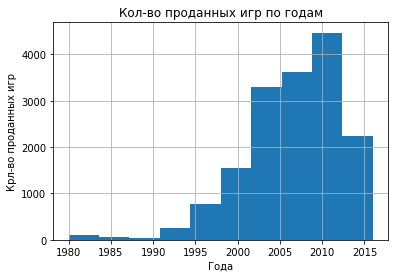

In [15]:
import pylab as pl
file1_hist = data.hist(column='year_of_release', sharex=True, sharey=True)
file1_hist[0][0].set_title('Кол-во проданных игр по годам')
file1_hist[0][0].set_xlabel('Года')
file1_hist[0][0].set_ylabel('Крл-во проданных игр')


Больше всего игр выпускалось с 2009 по 2012 год. С 1990 года по 2008, количество выпускаемых игр возрастало, затем наблюдается резкое снижение выпуска игр с 2012 года, и далее остаётся на том же урвоне.

**Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

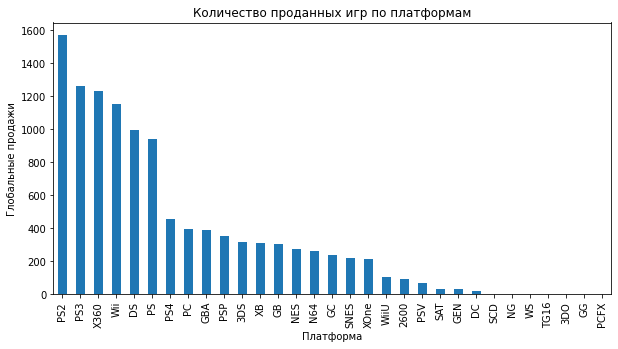

In [16]:
total_sales_per_platform = (data.groupby(['platform'],as_index = False)['total_sales'].sum()
                                 .sort_values('total_sales',ascending = False)
                           )

(total_sales_per_platform.plot(kind='bar',x='platform', y='total_sales',figsize=(10, 5),legend=False, title='Количество проданных игр по платформам')
                         .set(xlabel='Платформа', ylabel='Глобальные продажи')
)
plt.show()

Данный график нужен, чтобы посмотреть, на какой платформе продано больше всего игр - PS2.

In [17]:
top_now = total_sales_per_platform['platform'].tolist()
top_now

['PS2',
 'PS3',
 'X360',
 'Wii',
 'DS',
 'PS',
 'PS4',
 'PC',
 'GBA',
 'PSP',
 '3DS',
 'XB',
 'GB',
 'NES',
 'N64',
 'GC',
 'SNES',
 'XOne',
 'WiiU',
 '2600',
 'PSV',
 'SAT',
 'GEN',
 'DC',
 'SCD',
 'NG',
 'WS',
 'TG16',
 '3DO',
 'GG',
 'PCFX']

In [18]:
top_6_alltime = total_sales_per_platform.head(6)['platform'].tolist()
top_6_alltime

['PS2', 'PS3', 'X360', 'Wii', 'DS', 'PS']

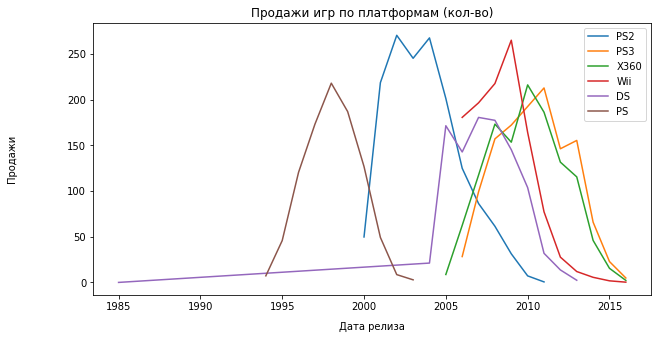

In [19]:
for name in top_6_alltime:
    data.query('platform == @name and year_of_release != -1').pivot_table(index = 'year_of_release',
                        values = 'total_sales', aggfunc = 'sum').sort_values('year_of_release',
                                                    ascending = False)['total_sales'].plot(figsize = (10, 5), label=name, title='Продажи игр по платформам (кол-во)')
   
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 50)
    plt.legend()

Если смотреть по годам, то на графике видно, как менялась популярность платформ в разные годы.

Так мы видим, что платформа PS2 (с наибольшим количеством игр) была популярна с 2001 по 2004 года, а затем популярнасть её начала снижаться.

Остальные платформы в разные года, повторяют это график: взлёт популярности и затем спад в связи с появлением другой платформы (в среднем, исходя из графика интервал популярности около 5 лет, после чего выходила новая платформа)

Также наблюдается примерно одинаковая популярность и спад в один период платформ PS3 и X360, т.к. эти платформы вышли примерно в одно и тоже время.

**Взять данные за актуальный период**

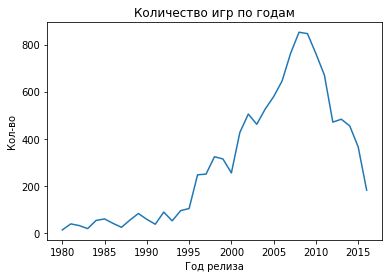

In [20]:
#Чтобы выявить актуальный период, построим график продаж по каждому году
data[data['year_of_release'] != 2077].groupby('year_of_release').agg({'total_sales':'sum'}).plot(legend=False,title='Количество игр по годам').set(xlabel='Год релиза', ylabel='Кол-во');

Исходя из графика, считаю актуальным взять данные начиная с 2014 года, когда началось плавное и неуклонное сниджение продаж.

**Пострить график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

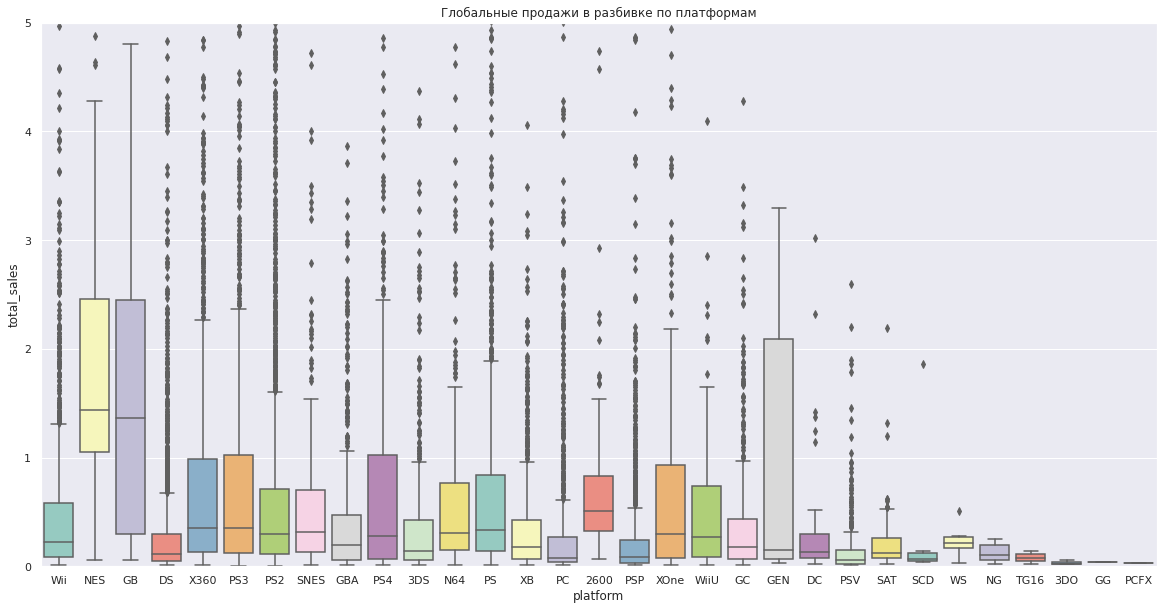

In [21]:
sns.set(rc={'figure.figsize':(20,10)}) # здесь я настраиваю размер самого графика в jupyter
ax = sns.boxplot(x="platform", y="total_sales", data= data, palette="Set3")
ax.set(ylim=(0,5))
ax.set_title('Глобальные продажи в разбивке по платформам');

Из данного графика, мы видим, что медианное значение оценок по большинству платформ дерджится в промежутке от 0 до 0,5. 

У не опулярных платформ большинство оценок (около 50%) так же в районе от 0 до 0,5. У популярных платформ этот показатель выше. также Большиснтво оценок в высоком диапазоене у непопулярных платформ GEN, GB, NES. Связано это скорее всего с тем, что на этих платформах играю толлько поклонники конкретных платформ/игр на этих платформах.

**Проанализирвоать как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами**

Строим диаграммы рассеяния по продажам и отзывам пользователей и критиков. Построив такие диаграммы, сможем проанализировать как они влияют на продажи.


In [22]:
#для начала найдём актуальные платформы по которым больше всего продаж. за точку старта возьмём 2012 год, 
#т.к. с этого момента количество игр не изменно
actual_platforms = data.query('year_of_release >= 2014')
actual_platforms_search = (actual_platforms.groupby(['platform'],as_index = False)['total_sales'].sum()
                                 .sort_values('total_sales',ascending = False)
                           )
actual_platforms_search

,platform,total_sales
3,PS4,418.19
9,XOne,186.61
0,3DS,102.80
2,PS3,93.72
8,X360,63.71
7,WiiU,56.13
1,PC,45.02
5,PSV,25.93
6,Wii,7.66
4,PSP,0.36


Из этой таблицы, можно сделать вывод, что по количеству продаж после 2014 года лидирует платформа PS4

In [23]:
top_now = actual_platforms_search['platform'].tolist()
top_now

['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP']

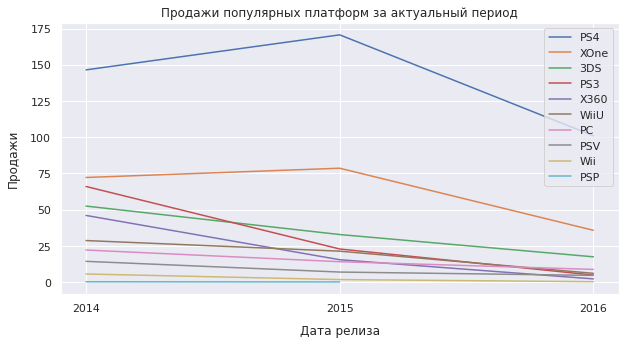

In [24]:
for name in top_now:
    actual_platforms.query('platform == @name').pivot_table(index = 'year_of_release',
                        values = 'total_sales', aggfunc = 'sum').sort_values('year_of_release',
                                                    ascending = False)['total_sales'].plot(figsize=(10, 5), label = name, title = 'Продажи популярных платформ за актуальный период')
    
    plt.xticks(np.arange(2014, 2017, step=1))
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 10)
    plt.legend()

График подтверждает, что больше всего продаж у PS4, так жепопулярной является платформа Xone. У названных двух платформ падение продаж происходит плавно, и ожидать увеличенияпродаж не стоит. 

In [25]:
#теперь отберём  дял постройки диаграм рассеяния по популярной платформе: PS4
PS4 = data[(data['platform'] == 'PS4') & (data['year_of_release'] >= 2014) & (data['critic_score'] != 0) & (data['user_score'] != 0)]

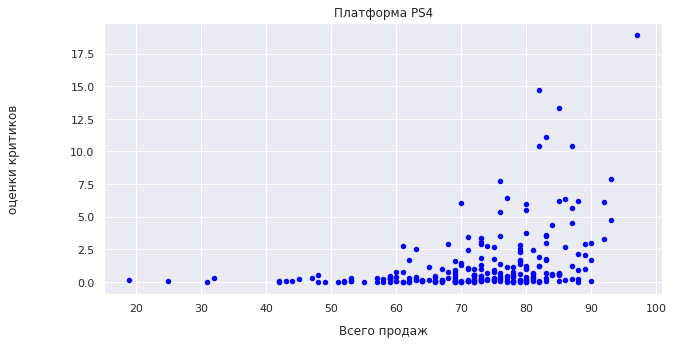

In [26]:
# влияние на продажи отзывов критиков
PS4.plot(x='critic_score', y='total_sales', kind='scatter', title='Платформа PS4',figsize=(10, 5), color='blue');
plt.xlabel('Всего продаж', labelpad = 10)
plt.ylabel('оценки критиков', labelpad = 50);

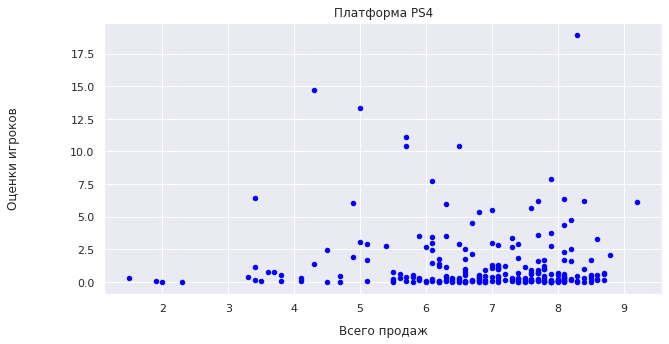

In [27]:
# влияние на продажи отзывов игроков
PS4.plot(x='user_score', y='total_sales', kind='scatter', title='Платформа PS4',figsize=(10, 5), color='blue');
plt.xlabel('Всего продаж', labelpad = 10)
plt.ylabel('Оценки игроков', labelpad = 50);

По диаграммам рассеяния можно увидеть, что оценка критиков или игроков не сильно влияет на покупку игры, т.к. большинство значений сосредоточены в низу диграммы и в правой часте, где низкие оценки и большое количество покупок.

**Соотнести выводы на разных платформах между собой**

Вторая по популярности в продажах платформа Xone. Построим и для неё такиеже диаграммы рассеяния, чтобы посомтреть влияют ли оценки на продажи.

In [28]:
XOne = data[(data['platform'] == 'XOne') & (data['year_of_release'] >= 2014) & (data['critic_score'] != 0) & (data['user_score'] != 0)]

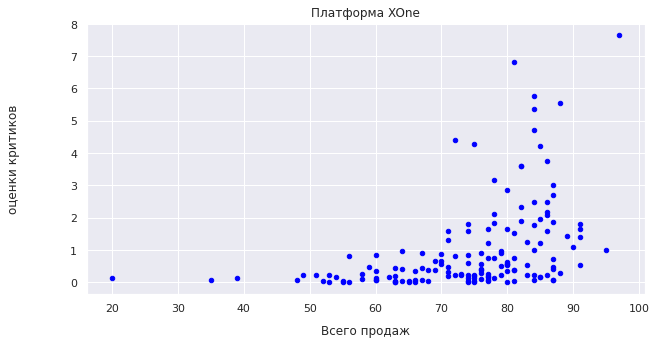

In [29]:
XOne.plot(x='critic_score', y='total_sales', kind='scatter', title='Платформа XOne',figsize=(10, 5), color='blue');
plt.xlabel('Всего продаж', labelpad = 10)
plt.ylabel('оценки критиков', labelpad = 50);

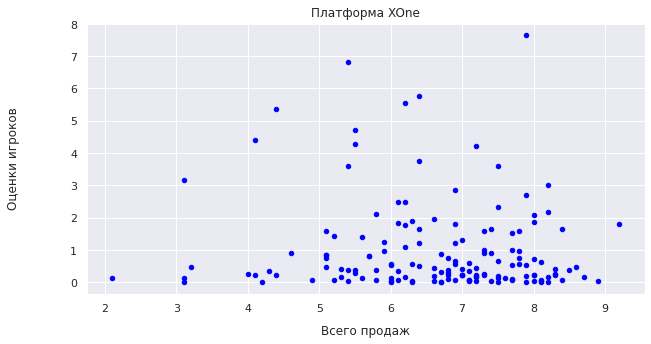

In [30]:
XOne.plot(x='user_score', y='total_sales', kind='scatter', title='Платформа XOne',figsize=(10, 5), color='blue');
plt.xlabel('Всего продаж', labelpad = 10)
plt.ylabel('Оценки игроков', labelpad = 50);

В целом, продажи снижаются на всех платформах, однако больше всего продаж на платформах вышедших в последние годы (на платформе PS4, вышедней последней, общее количество продаж больше 400, что больше чем у других платформ).

Исходя из графиков ящика с усами, оценки на разных платформах держатся примерно в одном диапазоне, и не сильно влияют на количество покупок, что подвеждается диагарммами рассеяния по самой популярной платформе PS4 - там нет зависимости колчиество покупок от оценок критиков или других игроков. такая же картина наблюдается и у второй по популярнсоти платформы - XOne. Оценки и количество продаж не сильно зависят друг от друга.

**Посмотреть на общее распределение игр по жанрам**

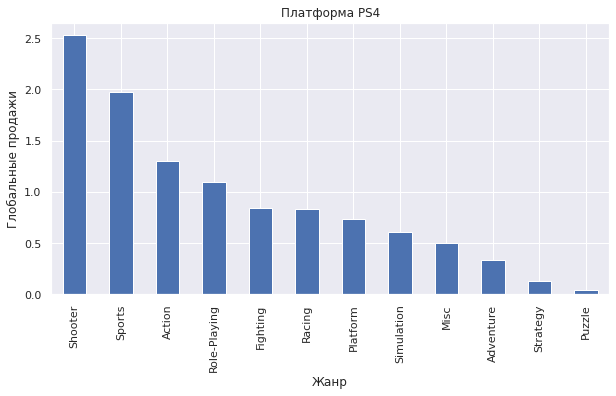

In [31]:
#посмотрим на распределение на самой популярной по продажам платформе
(PS4
    .pivot_table(index='genre', values='total_sales')
    .sort_values('total_sales', ascending=False)
    .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False,title = 'Платформа PS4')
    .set(xlabel='Жанр', ylabel='Глобальные продажи'))

plt.show()

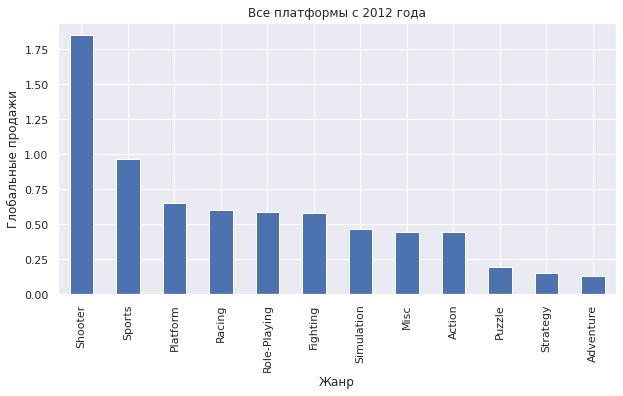

In [32]:
# Посмотрим на распределение по популярным платформам
(actual_platforms
    .pivot_table(index='genre', values='total_sales')
    .sort_values('total_sales', ascending=False)
    .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False,title = 'Все платформы с 2012 года')
    .set(xlabel='Жанр', ylabel='Глобальные продажи'))

plt.show()

Исходя из двух графиков выше можно сделать выводы:
- Что на самой популярной платформе, что на всех платформах самым популярным по покупкам счиатется жанр "Shooter". У него большне всего продаж.
- Adventure - самый не популярный жанр, по всем платформам, но не на самой популярной.
- На самой популярной платформе, саый непопулярный жанр это "Puzzle"

<a name="stage_1"></a>
# 4. Составить портрет пользователя кажлого региона (NA, EU, JP):


**Самые популярные платформы (топ-5). Опишите различия в долях продаж.**


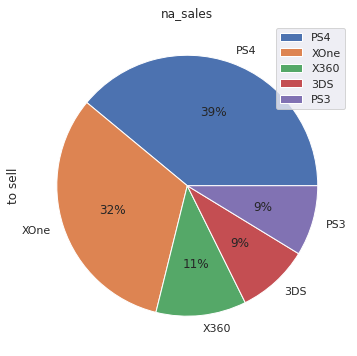

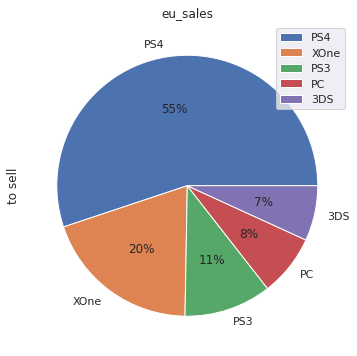

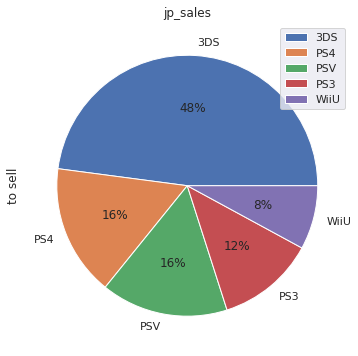

In [33]:
#Сначала нужно собрать всех пользователей по регионам
regions_users = ['na_sales','eu_sales','jp_sales']

#теперь посмотрим на доли продаж. для этого хорошо подойдёт круглая диаграмма
for region in regions_users:
    (actual_platforms.pivot_table(index='platform', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(6, 6), legend=True, title = region)
                .set(ylabel='to sell')
    )
    plt.show()

на круговых диограммах по регионам видно:
1. На Североамерканском рынке распределение продаж почти равномерно. Лидирует доля продаж X360 (доля 28%), а вот платформы PS4(22%)и PS3 (21%) почти равны, что говорит о том, что они равны по количеству продаж.
2. На Европейском рынке лидирует PS4 (31%), за ним идут PS3(26%), остальные меньше 205 доля продаж.
3. На японском рынке большую долю занимает 3DS(51%), остальные платформы меньше 20%
Из такого распределения можно сделать вывод о том, что на Американском и Еропейском рынке по продажам лидируют популярные во всём мире платформы, а во тв японии судя по всему популярна какя-то местная платформа для игр.

**Самые популярные жанры (топ-5). Поясните разницу.**

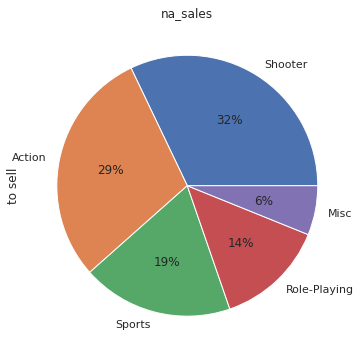

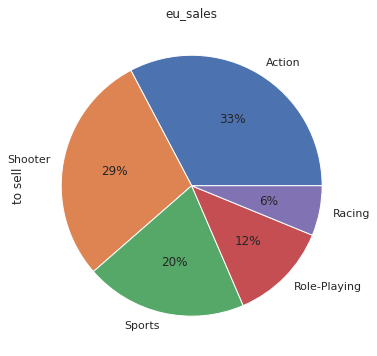

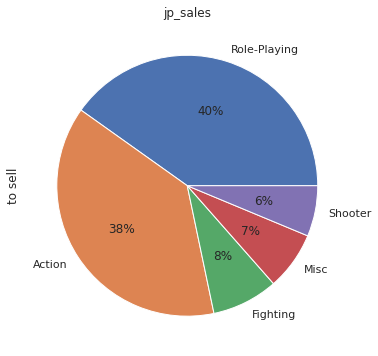

In [34]:
for region in regions_users:
    (actual_platforms.pivot_table(index='genre', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = region)
                .set(ylabel='to sell')
    )
    plt.show()

Из графиков виднно, что на Североамериканском и Европейском рыноках лидирует жанр "Action". На японском "Role-Playing". Объяснить эту разницу можно популярностью платформ в конкретном регионе. Видимо в ролевые игры на 3DS играть удобнее всего, а в экшин на платформах от X-box и Playstayhon.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

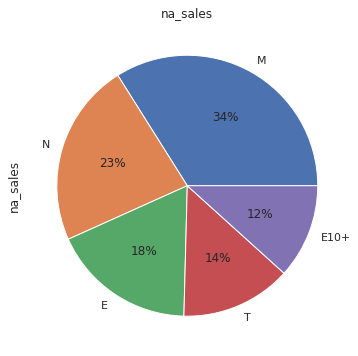

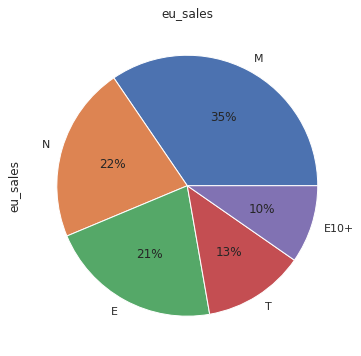

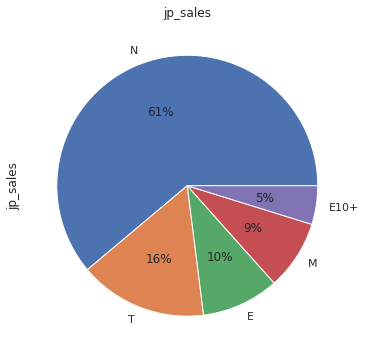

In [35]:

for region in regions_users:
    (actual_platforms.pivot_table(index='rating', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = region)
    )
    plt.show()

На Североамеркианском и Европейском рынке хорошо продаются игры с рейтингом "М". на японском без рейтинга.

**Вывод**

Среднестатический игрок из Севернйо америки и европы похожи - они предпочитают игры с рейтингом "М", и играют на платформах X-box и PS, а также предпочитают игры в жанре "Action" больше чем все остальные жанры.
Японский рынок уникальный. Там предпочитают играть на своей прситавке 3DS в ролевые игры без рейтинга.

<a name="stage_1"></a>
# 5. Проверка гипотез:


Необходимо проверить две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

У нас есть две гепотизы:

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [36]:
#
xone = actual_platforms.query("platform == 'XOne' and user_score != 0")
pc = actual_platforms.query("platform == 'PC' and user_score != 0")

print("Дисперсия выборки xone",np.var(xone['user_score']))
print("Дисперсия выборки pc",np.var(pc['user_score']))

Дисперсия выборки xone 1.8795460055096425
Дисперсия выборки pc 2.8773743617307175


In [37]:
#
alpha = .05

results = st.ttest_ind(
    xone['user_score'],
    pc['user_score'],
    equal_var=False  # Welch’s t-test, который не предполагает равенство дисперсий
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Дополнительно выведем средние значения рейтинга

In [38]:
xone['user_score'].mean()

6.594545454545456

In [39]:
pc['user_score'].mean()

6.298360655737705

Результат p-value говорит нам о том, что  с вероятностью почти в 12% получится такой же результат, что означает, что одинаковость оценок на выбранных двух платформах не случайна. Поэтмоу отвергнуть нулевую гипотезу не получится. 

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Две гипотезы:

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1: Средние пользовательские рейтинги жанров Action и Sports различаются.


In [40]:
#
action = actual_platforms.query("genre == 'Action' and user_score != 0")
sport = actual_platforms.query("genre == 'Sports' and user_score != 0")

print("Дисперсия выборки action",np.var(action['user_score']))
print("Дисперсия выборки sport",np.var(sport['user_score']))

Дисперсия выборки action 1.89208448117539
Дисперсия выборки sport 3.4198375596751185


In [41]:
#
alpha = .05

results = st.ttest_ind(
    action['user_score'],
    sport['user_score'],
    equal_var=False,  # Welch’s t-test, который не предполагает равенство дисперсий
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Дополнительно выведем средние значения рейтинга

In [42]:
action['user_score'].mean()

6.760606060606061

In [43]:
sport['user_score'].mean()

5.2251968503937

Вероятность получить одинаковые оценки составляет меньше 1%. Это очень маленькая вероятность поэтому нулевая гипотеза отвергается. Средний пользвоательский рейтинг жанров Action и Sports различаются.

<a name="stage_1"></a>
# 6. Написать общий вывод

По результатам проведённого исследования можно сделать следющие выводы:

1. Начиная с 2012 года выпуск игр на всех платформах находится на одном уровне, и он ниже чем был с 2008 по 2011 года.
2. Начиная с 2014 года наблюдается уменьшение продаж на всех популярных платформах.
3. Больше всего продаж по всем регионом риходится на платформу PS4 (~418 млн. копий начиная с 2014 г. ).
4. По популярности платформ и покупаемым играм по жанру Североамериканский и европейский рынок похожи, у них почти одинаковая доля продаж как по устройствам (X-box и PS - доли не меньше 20%) так и по популярности жанра (около 30 % приходится на "Action")
5. Японский рынок отличается от остальных, там лидирует своя платформа (51% доля продаж), так и по жанру (на 43% на ролевую игру)
5. По возрастному ограничению Японский рынок тоже отличается от остальных, в нём привалируют игры без возрастного рейтинга (57% доля продаж)
6. Среднии оценки на платформах Xbox One и PC одинаковые одинаковые, это подтверждается исследованием, о том, что при случайном соотношении оценок вероятность попасть в этот результат составляет 12% что является допустимым риском.
7. Среднии оценки по жанрам Action и Sports различаются, т.к. согласно исследвоанию, вероятность того что они будут одинаковые составляет меньше 1% что слишком высокий риск.

В итоге выгодно продавать игры под Североамериканский и Европейский рынок в жанре "Action" на платформах PS4 и XOne, на японском рынке для успешных продаж нужно учесть их особенности и сосредоточиться на платформе 3DS в жанре ролевой игры. так можно будет получить Максимальную прибыль т.к. от оценок продажи сильно не зависят (можно не опасатсья плохих отзывов).
